In [7]:
  # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  # type: ignore
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
def stock_beta(stock_symbol, market_symbol='^GSPC', start_date='2017-01-01', end_date='2023-01-01'):
    # 1. 下載數據
    stock = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']
    market = yf.download(market_symbol, start=start_date, end=end_date)['Adj Close']

    # 2. 計算日回報
    stock_returns = stock.pct_change().dropna()
    market_returns = market.pct_change().dropna()

    # 3. 合併數據集
    data = pd.concat([stock_returns, market_returns], axis=1, join='inner')
    data.columns = ['stock_returns', 'market_returns']

    # 4. 設定無風險利率 (這裡假設為2%)
    Rf = 0.02 / 252  # 日無風險利率，假設年化2%，轉換為日利率

    # 計算超額市場回報
    data['excess_market_returns'] = data['market_returns'] - Rf

    # 5. 定義回歸模型，y = 股票的超額回報，X = 市場的超額回報
    X = data['excess_market_returns'].values.reshape(-1, 1)
    y = (data['stock_returns'] - Rf).values

    # 建立線性回歸模型並訓練
    model = LinearRegression()
    model.fit(X, y)

    # 取得 beta 值
    beta = model.coef_[0]
    print(f"Estimated Beta for {stock_symbol}: {beta}")

    # 6. 畫出回歸線
    plt.scatter(data['excess_market_returns'], y, color='blue', label='Data points')
    plt.plot(data['excess_market_returns'], model.predict(X), color='red', label='Regression Line')
    plt.xlabel('Excess Market Returns')
    plt.ylabel('Excess Stock Returns')
    plt.title(f'Regression Analysis for {stock_symbol}')
    plt.legend()
    plt.show()

    return beta

In [1]:
def analyze_correlation(stock_symbols, start_date='2017-01-01', end_date='2023-01-01'):
    # 1. 下載所有股票的回報數據並合併
    data = pd.DataFrame()
    for symbol in stock_symbols:
        stock_data = yf.download(symbol, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()
        stock_data.name = symbol  # 設定列名
        data = pd.concat([data, stock_data], axis=1)

    # 2. 計算相關性
    correlation_matrix = data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    return correlation_matrix

In [14]:
def portfolio_beta(stock_symbols, market_symbol='^GSPC', start_date='2017-01-01', end_date='2023-01-01', weights=None):
    if weights is None:
        weights = [1 / len(stock_symbols)] * len(stock_symbols)

    if len(weights) != len(stock_symbols):
        raise ValueError("The length of weights must match the number of stock symbols.")

    betas = []
    for symbol in stock_symbols:
        beta = stock_beta(symbol, market_symbol, start_date, end_date)
        betas.append(beta)

    # 計算投組的 Beta
    portfolio_beta = np.dot(weights, betas)
    print(f"Portfolio Beta: {portfolio_beta}")
    return portfolio_beta

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Estimated Beta for AAPL: 1.2309899134320674


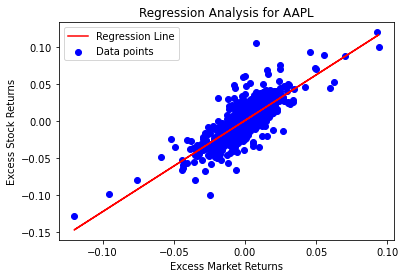

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Correlation Matrix:
Ticker      AAPL     GOOGL      AMZN
Ticker                              
AAPL    1.000000  0.689999  0.643759
GOOGL   0.689999  1.000000  0.680813
AMZN    0.643759  0.680813  1.000000
Estimated Beta for AAPL: 1.2309899134320674


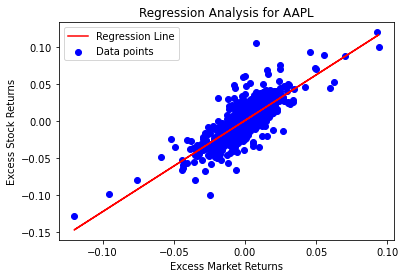

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Estimated Beta for GOOGL: 1.146532440765251


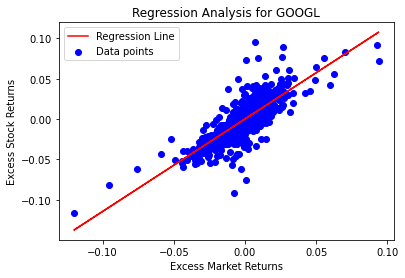

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Estimated Beta for AMZN: 1.102942734317054


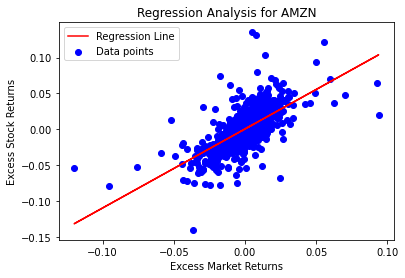

Portfolio Beta: 1.1800432358090198


1.1800432358090198

In [15]:
stock_beta('AAPL')
analyze_correlation(['AAPL', 'GOOGL', 'AMZN'])
portfolio_beta(['AAPL', 'GOOGL', 'AMZN'], weights=[0.5, 0.3, 0.2])